# Step 1: Importing Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import exp
import pandas as pd

In [2]:
df = pd.read_excel("dataset1.xlsx")
df.head()

,time,absorbance
0,0,0.441876
1,1,0.411688
2,2,0.384200
3,3,0.369743
4,4,0.342148


In [3]:
time = df.time
absorbance = df.absorbance
print time[:5]
print absorbance[:5]

0    0
1    1
2    2
3    3
4    4
Name: time, dtype: int64
0    0.441876
1    0.411688
2    0.384200
3    0.369743
4    0.342148
Name: absorbance, dtype: float64


In [6]:
df2 = pd.read_csv("dataset1.csv")
time = df2.time
absorbance = df2.absorbance
print time[:5]
print absorbance[:5]
df2.head()

0    0
1    1
2    2
3    3
4    4
Name: time, dtype: float64
0    0.441876
1    0.411688
2    0.384200
3    0.369743
4    0.342148
Name: absorbance, dtype: float64


,time,absorbance
0,0,0.441876
1,1,0.411688
2,2,0.384200
3,3,0.369743
4,4,0.342148


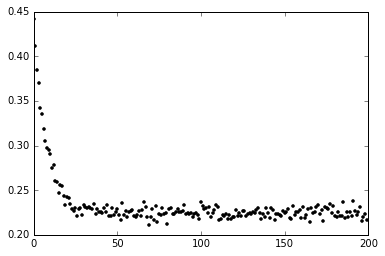

In [7]:
plt.plot(time,absorbance,"k.")

# Step 2: A First Look

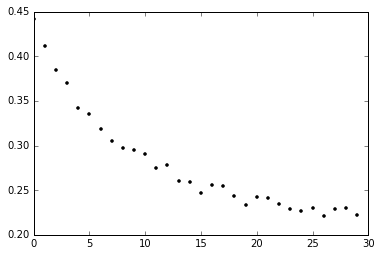

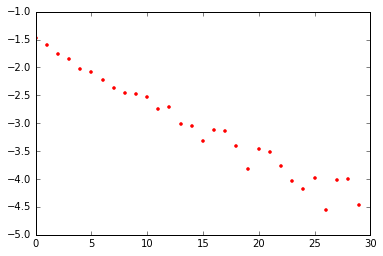

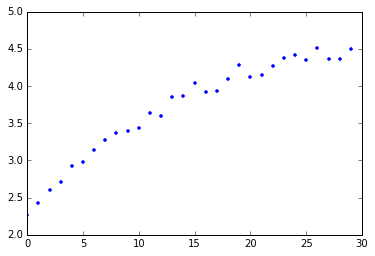

In [8]:
corrected_absorbance = absorbance - np.min(absorbance)
log_absorbance = np.log(corrected_absorbance)
one_over_absorbance = 1.0/absorbance

plt.plot(time[:30],absorbance[:30],"k.")
plt.show()
plt.plot(time[:30],log_absorbance[:30],"r.")
plt.show()
plt.plot(time[:30],one_over_absorbance[:30],"b.")
plt.show()

# Step 3: First-Order Fit

pre_factor:  0.2131 ± 0.0033
rate_const:  0.1320 ± 0.0032
offset:      0.2245 ± 0.0004


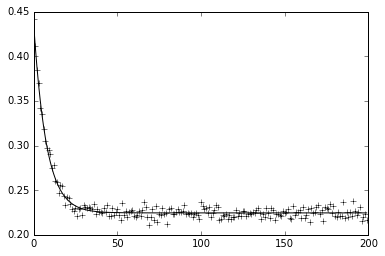

In [10]:
from scipy.optimize import curve_fit

def first_order_function(t, pre_factor, rate_constant, offset):
    return pre_factor*np.exp(-rate_constant*t) + offset

popt, pcov = curve_fit(first_order_function, time, absorbance)
errors = np.sqrt(np.diag(pcov))
print "pre_factor: %7.4f ± %6.4f" % (popt[0], errors[0])
print "rate_const: %7.4f ± %6.4f" % (popt[1], errors[1])
print "offset:     %7.4f ± %6.4f" % (popt[2], errors[2])

fitted_absorbance = first_order_function(time, popt[0], popt[1], popt[2])

plt.plot(time,absorbance,"k+")
plt.plot(time,fitted_absorbance,"k")

# Step 4: Plot the Residuals

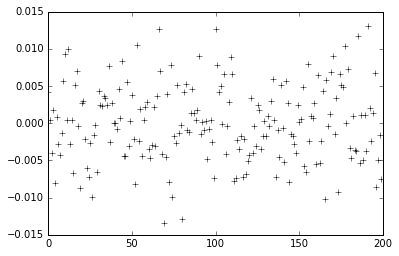

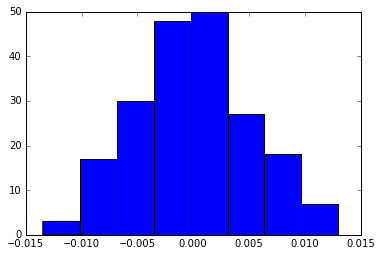

standard deviation: 5.11E-03


In [11]:
residual = absorbance - fitted_absorbance
plt.plot(time, residual, "k+")
plt.show()
plt.hist(residual,bins=8)
plt.show()
standard_deviation = np.std(residual)
print "standard deviation: %5.2E" % standard_deviation

# Step 5: Fit with Error Bars

pre_factor:  0.2139 ± 0.0090
rate_const:  0.1321 ± 0.0053
offset:      0.2241 ± 0.0004


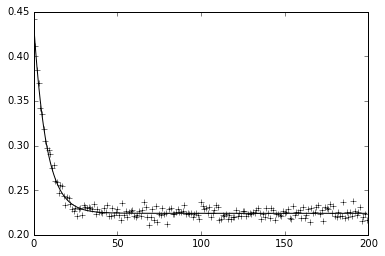

In [12]:
weights = [ (i/standard_deviation)**2 for i in absorbance ]

popt, pcov = curve_fit(first_order_function, time, absorbance, sigma=weights)
errors = np.sqrt(np.diag(pcov))

print "pre_factor: %7.4f ± %6.4f" % (popt[0], errors[0])
print "rate_const: %7.4f ± %6.4f" % (popt[1], errors[1])
print "offset:     %7.4f ± %6.4f" % (popt[2], errors[2])

fitted_absorbance2 = first_order_function(time, popt[0], popt[1], popt[2])

plt.plot(time,absorbance,"k+")
plt.plot(time,fitted_absorbance2,"k")

# Step 6: Chi-Square

In [17]:
dof = len(time)-3

def chi_square(observed, expected, stdev):
    chi_square_value = 0.0

    for i in range(len(observed)):
        o = observed[i]
        e = expected[i]
        chi_square_value += ((o-e) / standard_deviation)**2
    
    return chi_square_value

goodness_of_fit = chi_square(absorbance,fitted_absorbance2,standard_deviation) / dof
print "chi_square / dof = %.4f" % goodness_of_fit

chi_square / dof = 1.0233


# Step 7: Zeroth-Order Fit

c_1:  0.2569 ± 0.0039
c_2:  0.0002 ± 0.0000


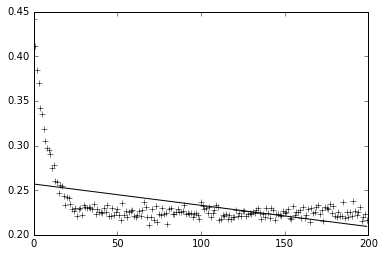

In [19]:
def zero_order_function(t, c_1, c_2):
    return c_1 - c_2*t

popt, pcov = curve_fit(zero_order_function, time, absorbance)
errors = np.sqrt(np.diag(pcov))
print "c_1: %7.4f ± %6.4f" % (popt[0], errors[0])
print "c_2: %7.4f ± %6.4f" % (popt[1], errors[1])

fitted_absorbance3 = zero_order_function(time, popt[0], popt[1])

plt.plot(time,absorbance,"k+")
plt.plot(time,fitted_absorbance3,"k")

chi_square / dof = 28.6341


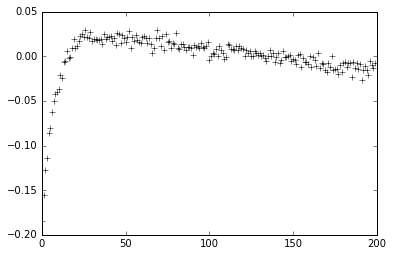

In [20]:
dof = len(time) - 2
residual3 = fitted_absorbance3 - absorbance
plt.plot(time,residual3,"k+")
goodness_of_fit = chi_square(absorbance,fitted_absorbance3,standard_deviation) / dof
print "chi_square / dof = %.4f" % goodness_of_fit

c_1:  0.3697 ± 0.0090
c_2:  0.0062 ± 0.0005
chi_square / dof = 3.4715


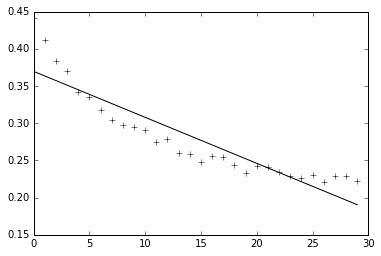

In [21]:
popt, pcov = curve_fit(zero_order_function, time[:30], absorbance[:30])
errors = np.sqrt(np.diag(pcov))
print "c_1: %7.4f ± %6.4f" % (popt[0], errors[0])
print "c_2: %7.4f ± %6.4f" % (popt[1], errors[1])

fitted_absorbance3 = zero_order_function(time[:30], popt[0], popt[1])

goodness_of_fit = chi_square(absorbance[:30],fitted_absorbance3,standard_deviation) / dof
print "chi_square / dof = %.4f" % goodness_of_fit

plt.plot(time[:30],absorbance[:30],"k+")
plt.plot(time[:30],fitted_absorbance3[:30],"k")

# Step 8: Second-Order Fit

c_1:  0.2813 ± 0.0222
c_2:  0.4697 ± 0.0570
c_3:  0.2177 ± 0.0007


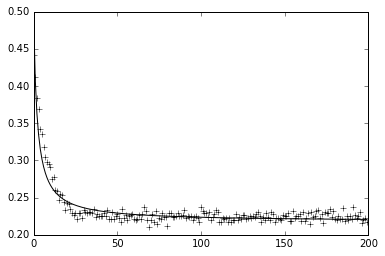

In [23]:
def second_order_function(t, c_1, c_2, c_3):
    return (c_1 / ( 1.0 + c_2*t )) + c_3

popt, pcov = curve_fit(second_order_function, time, absorbance,sigma=weights)
errors = np.sqrt(np.diag(pcov))
print "c_1: %7.4f ± %6.4f" % (popt[0], errors[0])
print "c_2: %7.4f ± %6.4f" % (popt[1], errors[1])
print "c_3: %7.4f ± %6.4f" % (popt[2], errors[2])

fitted_absorbance4 = second_order_function(time, popt[0], popt[1], popt[2])

plt.plot(time,absorbance,"k+")
plt.plot(time,fitted_absorbance4,"k")

chi_square / dof = 3.3651


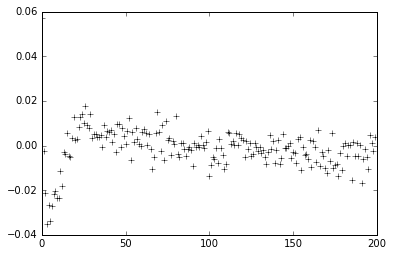

In [24]:
dof = len(time) - 3
residuals4 = fitted_absorbance4 - absorbance
plt.plot(time,residuals4,"k+")
goodness_of_fit = chi_square(absorbance,fitted_absorbance4,standard_deviation) / dof
print "chi_square / dof = %.4f" % goodness_of_fit

# Summary

pre_factor:  0.2139 ± 0.0090
rate_const:  0.1321 ± 0.0053
offset:      0.2241 ± 0.0004
chi_square / dof = 1.0233


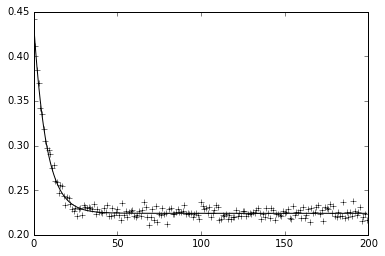

In [26]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import exp
import pandas as pd
from scipy.optimize import curve_fit

df = pd.read_csv("dataset1.csv")
time = df.time
absorbance = df.absorbance

def first_order_function(t, pre_factor, rate_constant, offset):
    return pre_factor*np.exp(-rate_constant*t) + offset

popt, pcov = curve_fit(first_order_function, time, absorbance)
fitted_absorbance = first_order_function(time, popt[0], popt[1], popt[2])
residual = absorbance-fitted_absorbance
standard_deviation = np.std(residual)
weights = [ (i/standard_deviation)**2 for i in absorbance ]

popt, pcov = curve_fit(first_order_function, time, absorbance, sigma=weights)
errors = np.sqrt(np.diag(pcov))
print "pre_factor: %7.4f ± %6.4f" % (popt[0], errors[0])
print "rate_const: %7.4f ± %6.4f" % (popt[1], errors[1])
print "offset:     %7.4f ± %6.4f" % (popt[2], errors[2])

fitted_absorbance = first_order_function(time, popt[0], popt[1], popt[2])

dof = len(time)-3
def chi_square(observed, expected, stdev):
    chi_squared_value = 0.0
    for i in range(len(observed)):
        o = observed[i]
        e = expected[i]
        chi_squared_value += ((o-e) / standard_deviation)**2
    return chi_squared_value
goodness_of_fit = chi_square(absorbance,fitted_absorbance,standard_deviation) / dof
print "chi_square / dof = %.4f" % goodness_of_fit

plt.plot(time,absorbance,"k+")
plt.plot(time,fitted_absorbance,"k")